In [2]:
#Importando Biblioteca

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [4]:
#Upload do arquivo
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [5]:
#Criando DataFrame
df = pd.read_excel("AdventureWorks.xlsx")

In [6]:
#Visualização de dados
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [7]:
#Quantidade de linha e coluna
df.shape

(904, 16)

In [8]:
#Verifiando tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [9]:
#Qual a receita Total?
df["Valor Venda"].sum()

5984606.1426

In [10]:
#Qual o custo total
round(df["Custo Unitário"].sum(), 2)

245893.56

In [11]:
#Após achar o a receita e o custo total vamos criar uma colun para armazenar
#uma coluna de lucro
df["lucro"] = df["Valor Venda"] - df["Custo Unitário"]

In [12]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,4199.42


In [13]:
#Lucro total
round(df["lucro"].sum(), 2)

5738712.58

In [14]:
#Criando uma coluna para verificar o tempo de envio dos produtos
df["Tempo_envio"] = df["Data Envio"] - df["Data Venda"]

In [15]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,4199.42,20 days


In [16]:
#Vamos descobrir a média de envio de cada marca


In [17]:
#Extrair os dias de envio
df["Tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [18]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,4199.42,20


In [19]:
#Verificando a coluna de tempo de envio
df["Tempo_envio"].dtype

dtype('int64')

In [20]:
#Média do tempo de envio
df.groupby("Marca")["Tempo_envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

In [21]:
#Verificar se tem dados faltantes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
lucro             0
Tempo_envio       0
dtype: int64

In [22]:
#Vamos saber o lucro por ano e marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    5.872481e+05
            Contoso            1.304908e+05
            Fabrikam           2.339704e+06
2009        Adventure Works    7.863930e+05
            Contoso            3.190303e+05
            Fabrikam           1.575846e+06
Name: lucro, dtype: float64

In [23]:
pd.options.display.float_format = "{:20,.2f}".format

In [24]:
#Resetando o index
lucros_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()

In [25]:
#Vamos vefiricar a quantidade de produtos vendidos?
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending = False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

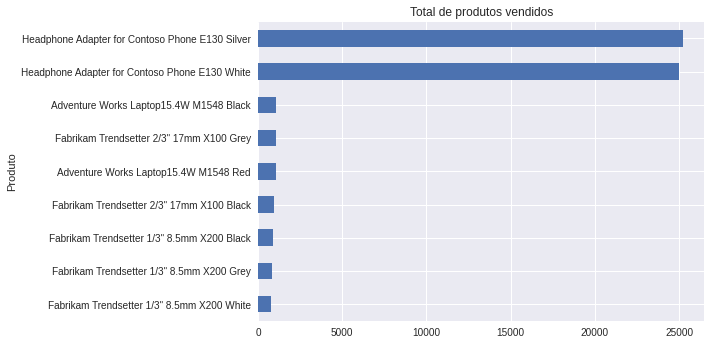

In [26]:
#Gráfico do total dos produtos vendidos 
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending = True).plot.barh(title="Total de produtos vendidos")

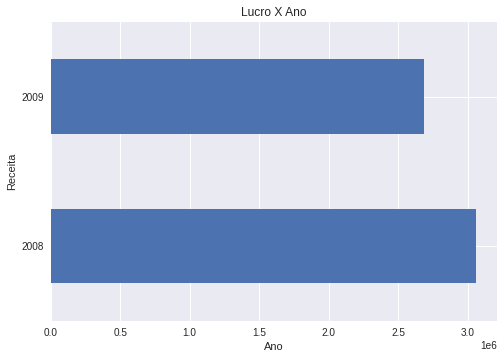

In [27]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.barh(title="Lucro X Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [28]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum()

Data Venda
2008           3,057,443.12
2009           2,681,269.46
Name: lucro, dtype: float64

In [30]:
#Verificando somente as vendas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [31]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,lucro,Tempo_envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"4,199.42",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"4,199.42",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"4,199.42",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"4,199.42",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"4,199.42",4


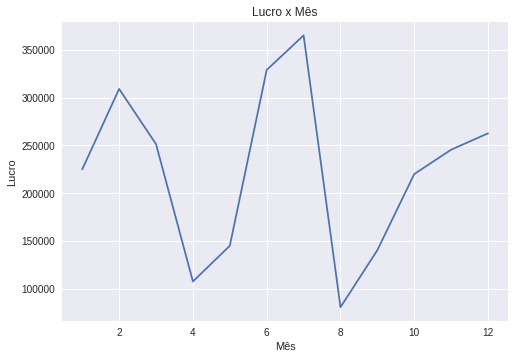

In [34]:
#Vamos verificar o lucro mensal
df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

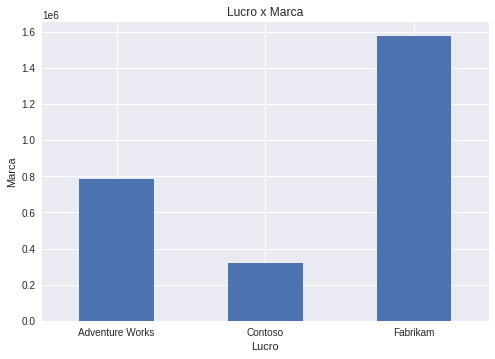

In [37]:
#Verificar o lucro de cada marca
df_2009.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Lucro")
plt.ylabel("Marca")
plt.xticks(rotation="horizontal");

In [39]:
df["Tempo_envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

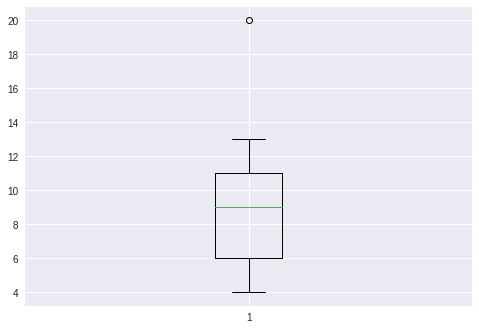

In [41]:
#Gráfico de Boxplot
plt.boxplot(df["Tempo_envio"]);

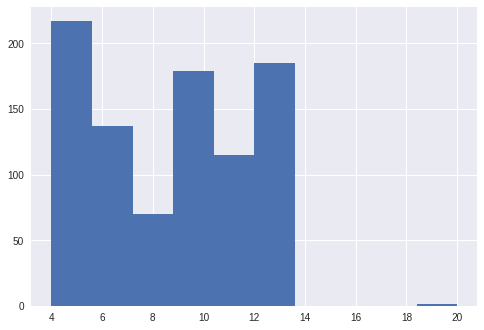

In [48]:
plt.hist(df["Tempo_envio"]);

In [44]:
df["Tempo_envio"].min()

4

In [46]:
#Indentificador de outlier
df[df["Tempo_envio"]==20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"4,199.42",20


In [49]:
df.to_csv("df-vendas-novo.csv", index=False)